## [album](https://album.solutions/) tutorial

![album logo that has some pictures of an album and says "everything is a solution"](https://album.solutions/static/b9d5cc5fb954397c6a806c9557136d3f/d8669/album-default-catalog-landing.webp)

### 2023 @ CZ Imaging Institute
##### Kyle Harrington, Team Lead, Machine Learning, Chan Zuckerberg Imaging Institute (czii@kyleharington.com)

This notebook is intended to be run as an album solution: link here.

If you see this message, then you are probably running this the wrong way.

# [album](https://album.solutions/)

shareable scientific software solutions

In [1]:
from IPython.display import IFrame, HTML
# IFrame('https://album-app.gitlab.io/catalogs/helmholtz-imaging/de.mdc-berlin/polarityjam/0.1.0', width=800, height=400)

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

def embed_webpage(url, width, height, scale):
    scaled_width = width / scale
    scaled_height = height / scale
    iframe_html = f"""
    <div style="width: {scaled_width}px; height: {scaled_height}px; overflow: hidden;">
        <iframe src="{url}" width="{width}px" height="{height}px" style="transform: scale({scale}); transform-origin: top left; border: 0;"></iframe>
    </div>
    """
    return HTML(iframe_html)

In [2]:
embed_webpage('https://album-app.gitlab.io/catalogs/helmholtz-imaging/de.mdc-berlin/polarityjam/0.1.0', 800, 600, 0.75)

# Background

album team

# [Installation](https://docs.album.solutions/en/latest/installation-instructions.html#)

GUI:

- [Windows](https://gitlab.com/album-app/plugins/album-package/-/jobs/artifacts/main/raw/installer/album_installer.exe?job=windows_installer_build)
- [MacOS](https://gitlab.com/album-app/plugins/album-package/-/jobs/artifacts/main/raw/installer/album_installer.app?job=macos_installer_build)
- [Linux](https://gitlab.com/album-app/plugins/album-package/-/jobs/artifacts/main/raw/installer/album_installer?job=linux_installer_build)

CLI:

```
conda create -n album album python=3.10 -c conda-forge
conda activate album
```

# album via gui

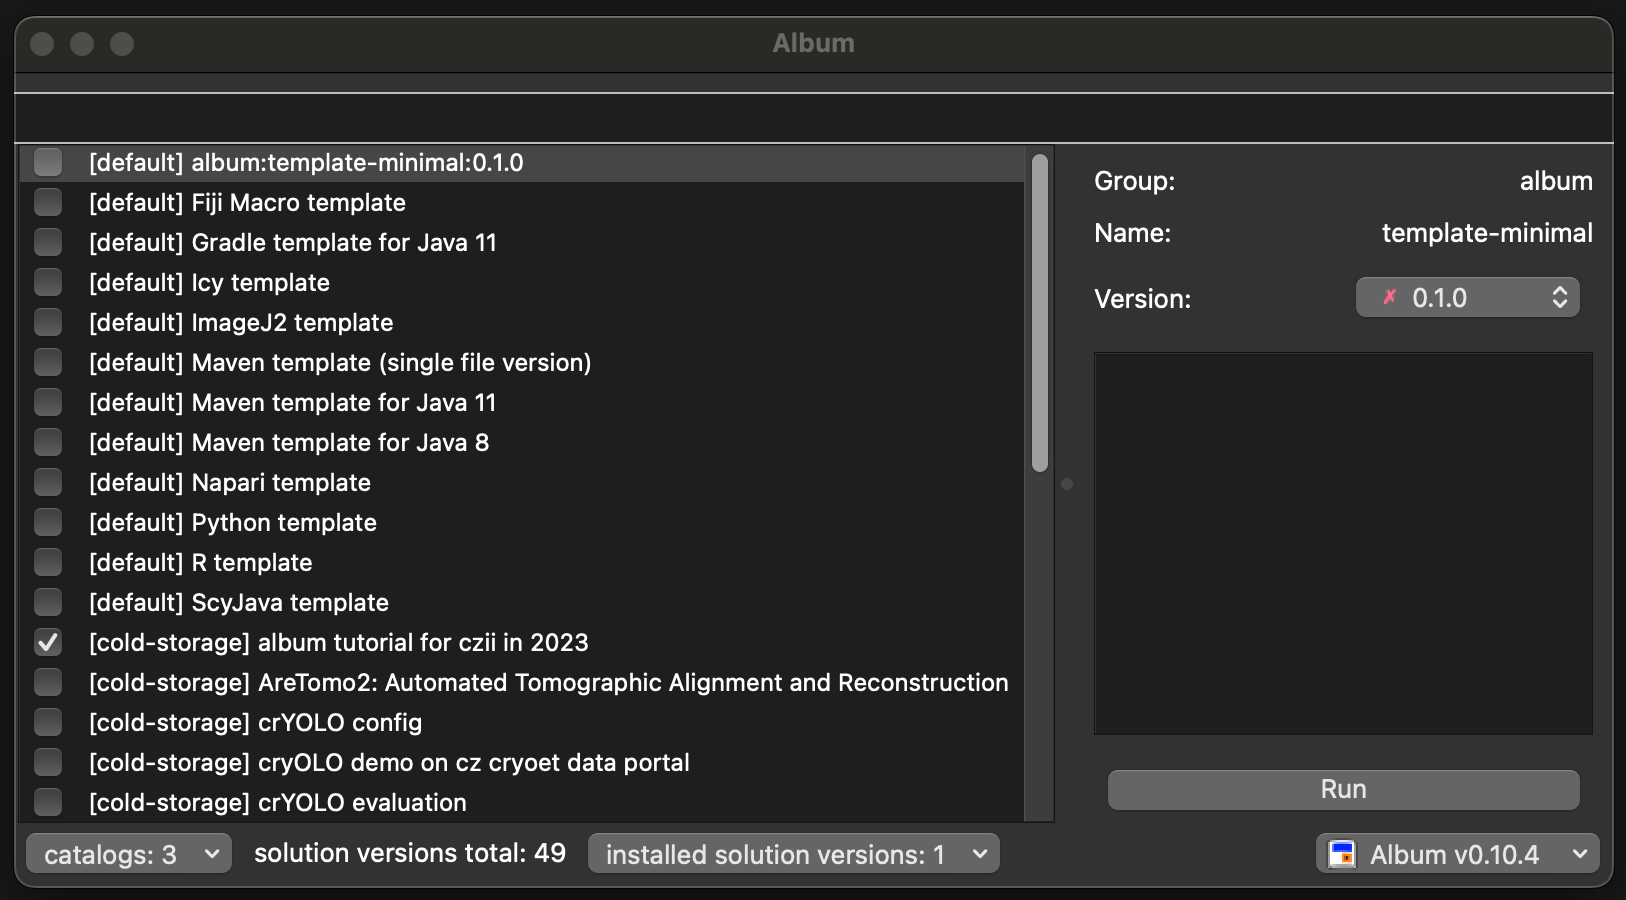

In [3]:
!pip install git+https://gitlab.com/album-app/album.git
!pip install git+https://gitlab.com/album-app/plugins/album-gui.git

  Cloning https://gitlab.com/album-app/album.git to /private/var/folders/z0/_bcy172x6xg12j6wylfkhc_h0000gq/T/pip-req-build-7pda1jtl
  Running command git clone --filter=blob:none --quiet https://gitlab.com/album-app/album.git /private/var/folders/z0/_bcy172x6xg12j6wylfkhc_h0000gq/T/pip-req-build-7pda1jtl
  Resolved https://gitlab.com/album-app/album.git to commit c35679776efa68773fff59032b647b955999c1a6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://gitlab.com/album-app/plugins/album-gui.git to /private/var/folders/z0/_bcy172x6xg12j6wylfkhc_h0000gq/T/pip-req-build-v3iz55kh
  Running command git clone --filter=blob:none --quiet https://gitlab.com/album-app/plugins/album-gui.git /private/var/folders/z0/_bcy172x6xg12j6wylfkhc_h0000gq/T/pip-req-build-v3iz55kh
  Resolved https://gitlab.com/album-app/plugins/album-gui.git to commit 14d723f6fa7aa310c8bc46fc842b3209baddbedb
  Preparing met

In [4]:
from album.api import Album
from album.gui.app import AlbumGUI

album = Album.Builder().build()
album.load_or_create_collection()
gui = AlbumGUI(album)

# The GUI blocks 
# gui.launch()


DEBUG:root:Set loglevel to INFO...


# album via CLI

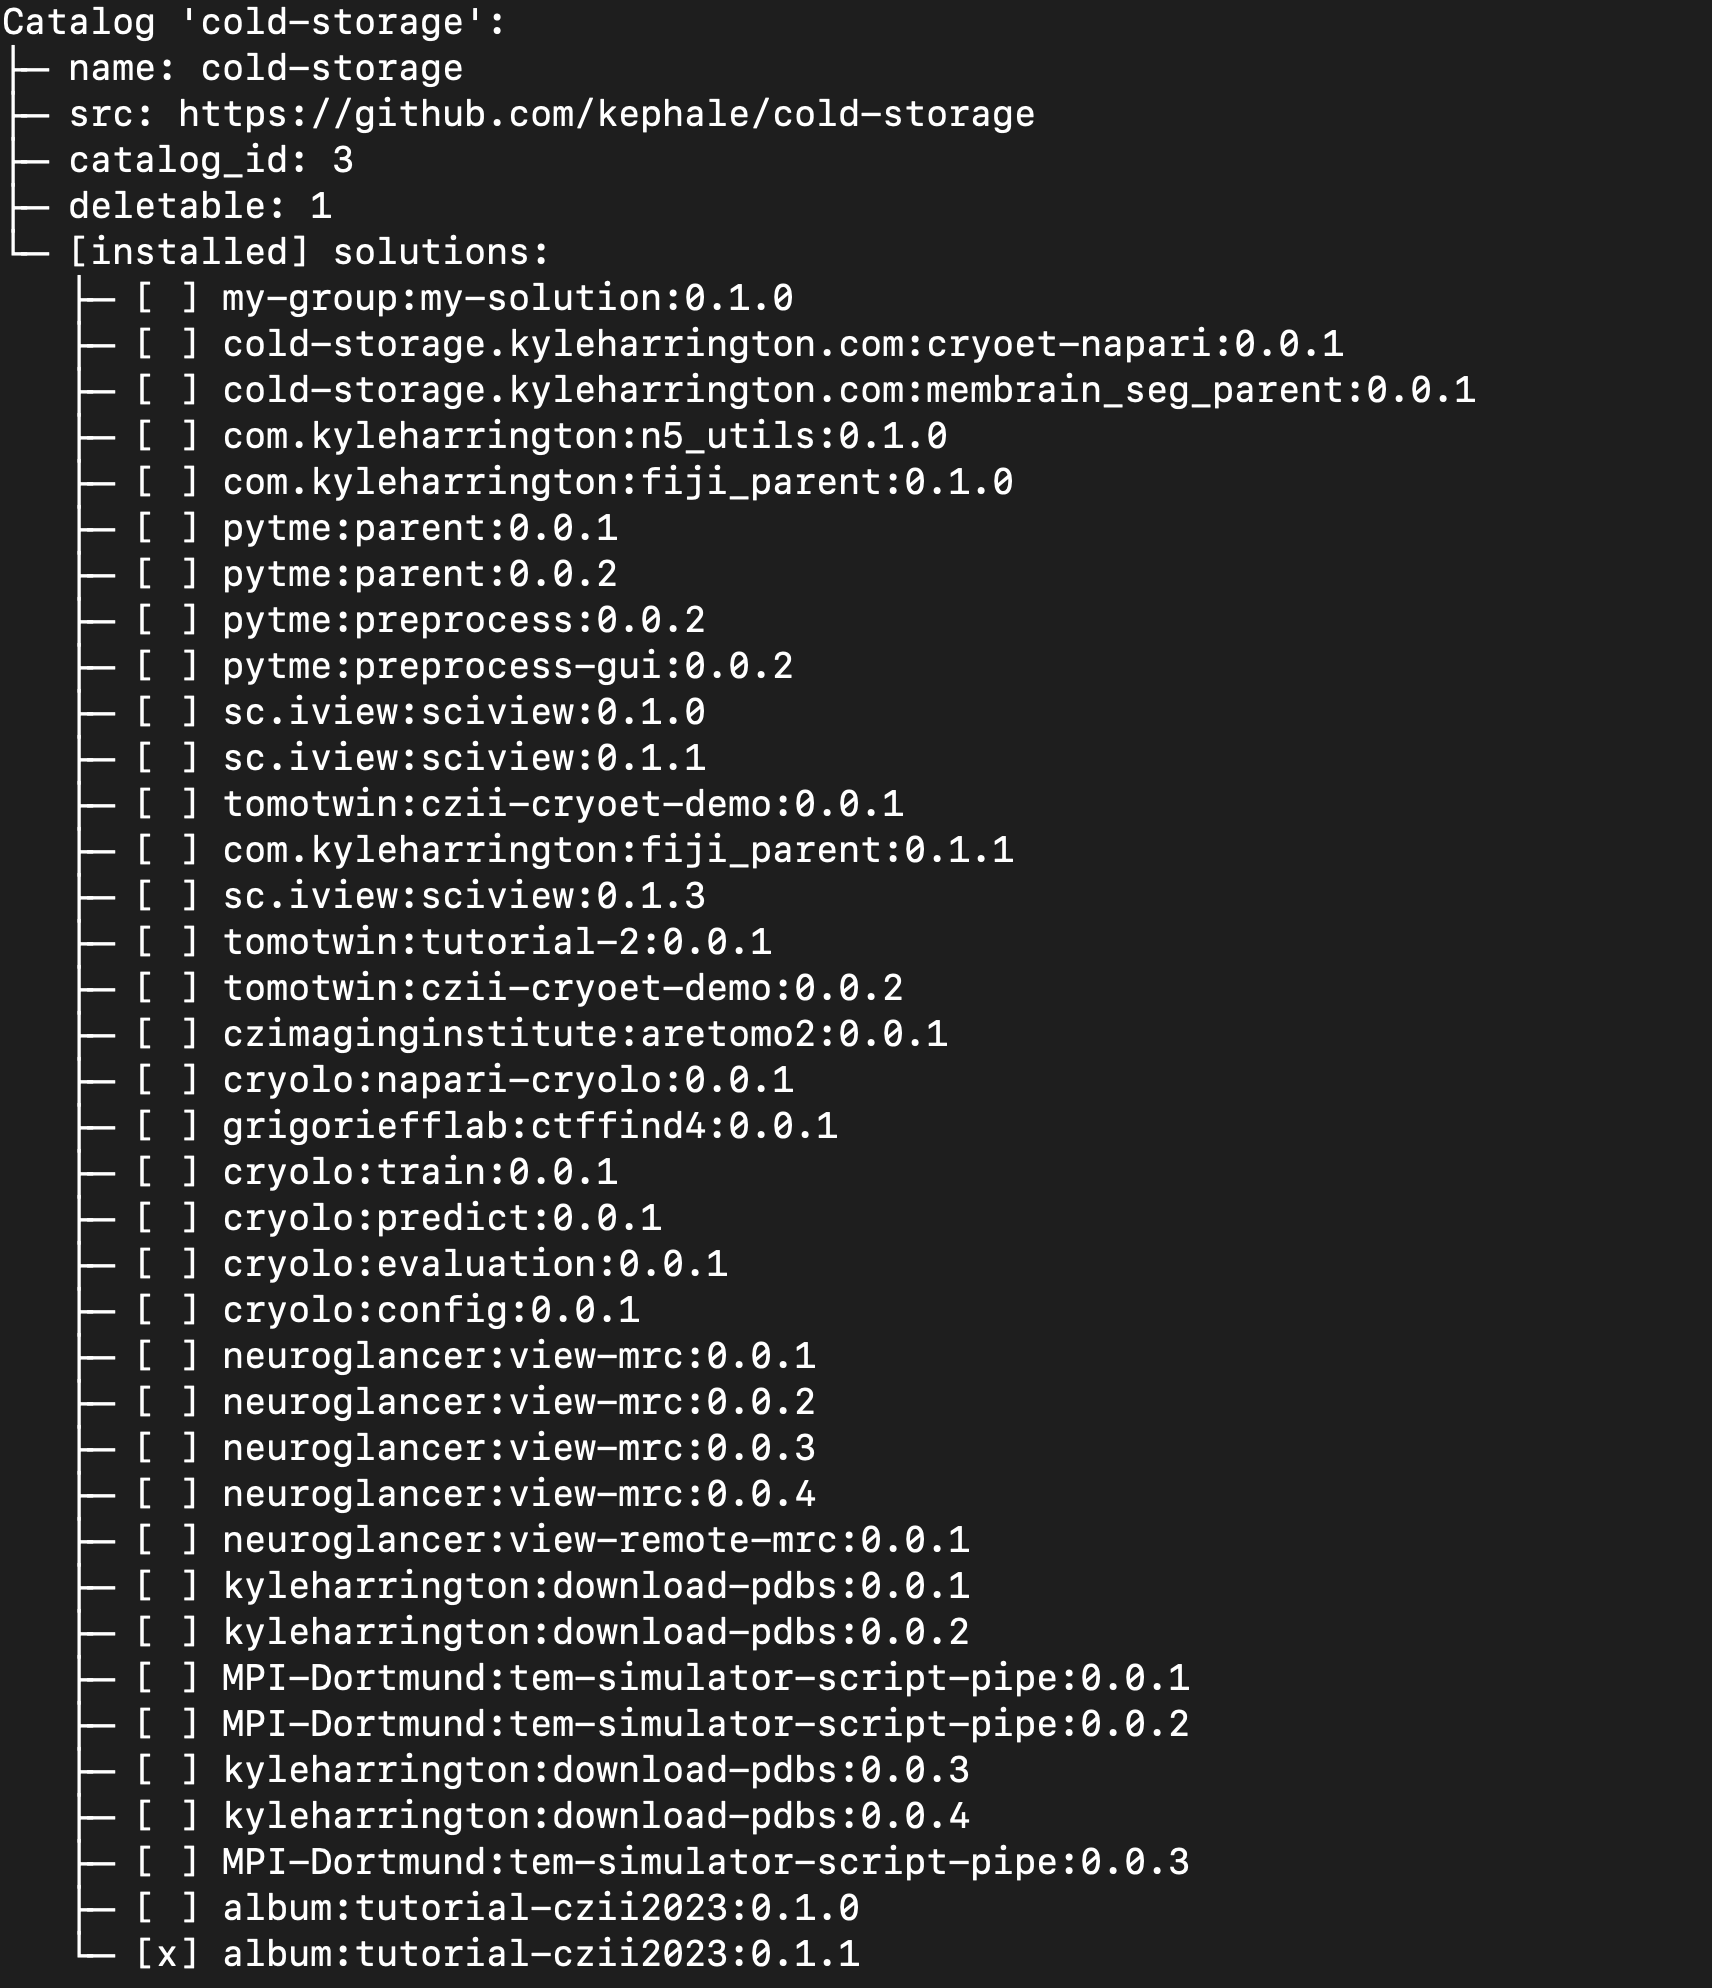

bash completion

# album catalogs

- [Helmholtz Imaging](https://album-app.gitlab.io/catalogs/helmholtz-imaging/catalog)
- [cold-storage](http://cold-storage.kyleharrington.com/catalog)
- [BetaSeg](https://betaseg.github.io/solutions/catalog)
- [solutions.computational.life](https://solutions.computational.life/catalog)

# [Writing album solutions](https://docs.album.solutions/en/latest/solution-development.html)

In [5]:
# Note: we only import from album in the solution file
from album.runner.api import setup

# This defines the environment conda/micromamba will create
env_file = """channels:
 - conda-forge
 - defaults
dependencies:
 - python=3.10
"""

# This will be executed when we install the solution.
#  Use this to:
#  - configure the conda environment
#  - download data
#  - etc.
def install():
    print("installing..")

# This will be executed when we run the solution
# Note: you need to add import statements inside this function
def run():
    from album.runner.api import get_args

    args = get_args()
    print("Hi " + args.name + ", nice to meet you!")

# This defines the complete solution
setup(
    group="my-group-name",
    name="my-solution-name",
    version="0.1.0-SNAPSHOT",
    album_api_version="0.5.1",
    args=[
        {
            "name": "name",
            "type": "string",
            "default": "Bugs Bunny",
            "description": "How to you want to be addressed?",
        }
    ],
    run=run,
    install=install,  
    dependencies={"environment_file": env_file},
)

# Solutions as Python code



In [6]:
# This code snippet is from: https://github.com/polarityjam/polarityjam/blob/dev/src/polarityjam/segmentation/microsam.py
# This implementation/strategy was developed by: 
#   JPA, https://github.com/jpalbrecht

"""Module holding the SAM segmentation solution."""
from album.runner.api import get_args, get_cache_path, setup

# DO NOT IMPORT ANYTHING OTHER THAN FROM RUNNER API HERE

env_file = """name:  microSAM
channels:
  - pytorch
  - nvidia
  - conda-forge
dependencies:
  - python=3.10
  - tifffile>=2023.7.18
  - pytorch>=2.0.0
  - torchvision>=0.15.0
  - pytorch-cuda=11.7
  - micro_sam=0.3.0post1
  - pip
"""


def setup_album():
    """Initialize the album api."""
    from album.api import Album

    album_api = Album.Builder().build()
    album_api.load_or_create_collection()

    return album_api


def run():
    """Python code that is executed in the solution environment."""
    # parse arguments
    args = get_args()

    # cache path
    cache_path = get_cache_path()

    import os

    import numpy as np
    import tifffile
    from micro_sam import instance_segmentation, util
    from micro_sam.util import get_sam_model

    # open tiff
    img_channel = tifffile.TiffFile(args.input_path).asarray()

    embedding_path = args.embedding_path
    if (
        args.embedding_path is None
        or args.embedding_path == "None"
        or args.embedding_path == ""
    ):
        embedding_path = str(cache_path.joinpath("embeddings.zarr"))

    checkpoint_path = args.checkpoint_path
    if (
        args.checkpoint_path is None
        or args.checkpoint_path == "None"
        or args.checkpoint_path == ""
    ):
        checkpoint_path = None

    sam_pred = get_sam_model(
        model_type=args.model_name, checkpoint_path=checkpoint_path
    )
    amg = instance_segmentation.AutomaticMaskGenerator(sam_pred)
    embeddings = util.precompute_image_embeddings(
        sam_pred, img_channel, save_path=embedding_path
    )
    amg.initialize(img_channel, embeddings, verbose=True)
    instances_amg = amg.generate(pred_iou_thresh=args.pred_iou_thresh)
    instances_amg = instance_segmentation.mask_data_to_segmentation(
        instances_amg, shape=img_channel.shape, with_background=True
    )

    # save masks
    out_file = os.path.join(args.output_path, "mask.npy")
    np.save(out_file, instances_amg, allow_pickle=True)


setup(
    group="polarityjam",
    name="microSAM-predict",
    version="0.1.0",
    title="Micro Segment Anything Segmentation",
    description="A solution to create segmentations with the previously trained "
    "microSAM model fintetuned from the Segment Anything model from facebookresearch.",
    solution_creators=["Jan Philipp Albrecht"],
    tags=[
        "segmentation",
        "machine_learning",
        "images",
        "SAM",
        "facebook",
        "anything",
        "microSAM",
    ],
    license="MIT",
    documentation=["https://github.com/computational-cell-analytics/micro-sam.git"],
    covers=[],
    album_api_version="0.5.5",
    args=[
        {
            "name": "input_path",
            "type": "string",
            "required": True,
            "description": "Path (file) to the 1 channel (greyscale) image to be segmented.",
        },
        {
            "name": "output_path",
            "type": "string",
            "required": True,
            "description": "Path (directory) where the result mask will be stored.",
        },
        {
            "name": "model_name",
            "type": "string",
            "required": False,
            "description": "The name to the model to use.",
            "default": "vit_h",
        },
        {
            "name": "embedding_path",
            "type": "string",
            "required": False,
            "description": "Path (directory) where the image embedding model is stored.",
        },
        {
            "name": "checkpoint_path",
            "type": "string",
            "required": False,
            "description": "Path (file) to the checkpoint of the model to use. If none is given default url is used based on your model name.",  # noqa: E501
            "default": None,
        },
        {
            "name": "pred_iou_thresh",
            "type": "float",
            "required": False,
            "description": "The models own prediction of the masks quality. Quality is filtered by this parameter.",
            "default": 0.88,
        },
    ],
    run=run,
    dependencies={"environment_file": env_file},
)


class MicrosamSegmenter:
    """Microsam segmentation class."""

    DOWNLOAD_PATH_REL = None

    def __init__(self, params):
        """Initialize the segmenter with the given parameters."""
        self.params = params
        self.model_name = params.model_name  # type: ignore
        self.checkpoint_path = params.checkpoint_path  # type: ignore
        self.embedding_path = params.embedding_path  # type: ignore
        self.pred_iou_thresh = params.pred_iou_thresh  # type: ignore

        self.tmp_dir = self._get_tmp_dir()

        if self.checkpoint_path == "":
            self.checkpoint_path = None

        if self.embedding_path == "":
            self.embedding_path = self.tmp_dir.name

    @staticmethod
    def _get_tmp_dir():
        """Get a temporary directory."""
        import tempfile

        return tempfile.TemporaryDirectory(dir=tempfile.gettempdir())

    def segment(
        self,
        img,
        path=None,
        mode=None,
    ):
        """Segment the given image.

        Args:
            img:
                The image to segment.
            path:
                The path to the image.
            mode:
                The mode to use for segmentation. Either nucleus, organelle or cell.

        Returns:
            The segmented image as numpy array.

        """
        import os
        import tempfile

        import numpy as np
        import tifffile

        from polarityjam.controller.segmenter import SegmentationMode
        from polarityjam.polarityjam_logging import get_logger

        if path is not None:
            get_logger().warning(
                "You configured a path for loading an existing segmentation. "
                "This segmentation algorithm does not support loading segmentations from disk!"
            )

        if mode is None:
            mode = SegmentationMode.CELL

        if isinstance(mode, str):
            try:
                mode = SegmentationMode(mode)
            except ValueError:
                raise ValueError(
                    'Mode must be either "nucleus", "organelle", "cell" or "junction".'
                )

        if mode == SegmentationMode.NUCLEUS:
            img = img[:, :, 1]
        elif mode == SegmentationMode.CELL:
            img = img[:, :, 0]
        elif mode == SegmentationMode.ORGANELLE:
            img = img[:, :, 2]
        elif mode == SegmentationMode.JUNCTION:
            raise ValueError("This segmentation algorithm does not support this mode!")
        else:
            raise ValueError(
                'Mode must be either "nucleus", "organelle", "cell" or "junction".'
            )

        def _install():
            # installs this file (the solution)
            path = os.path.abspath(__file__)
            album.install(path)

        solution_id = "polarityjam:microSAM-predict:0.1.0"
        album = setup_album()

        try:
            r = album.is_installed(solution_id)
            if not r:
                _install()
        except LookupError:
            _install()

        # save img to temporary folder
        self.tmp_dir = tempfile.TemporaryDirectory(dir=tempfile.gettempdir())
        img_path = os.path.join(self.tmp_dir.name, "segmentation.tif")
        tifffile.imwrite(img_path, img)

        # build argv
        argv = [
            os.path.dirname(os.path.realpath(__file__)),
            "--input_path=%s" % str(img_path),
            "--output_path=%s" % str(self.tmp_dir.name),
            "--model_name=%s" % str(self.model_name),
            "--pred_iou_thresh=%s" % str(self.pred_iou_thresh),
        ]

        if self.embedding_path is not None:
            argv.append("--embedding_path=%s" % str(self.embedding_path))

        if self.checkpoint_path is not None:
            argv.append("--checkpoint_path=%s" % str(self.checkpoint_path))

        # call microSAM solution
        album.run(solution_to_resolve=solution_id, argv=argv)

        # load segmentation
        masks = np.load(os.path.join(self.tmp_dir.name, "mask.npy"), allow_pickle=True)

        return masks

    @staticmethod
    def prepare(img, img_parameter):
        """Prepare the image for segmentation.

        Args:
            img:
                The image to prepare. Assumes channel last!
            img_parameter:
                The image parameter.

        Returns:
            Tuple of the prepared image and the image parameter.

        """
        import numpy as np

        from polarityjam.model.parameter import ImageParameter
        from polarityjam.polarityjam_logging import get_logger

        params_prep_img = ImageParameter()
        px_to_m_r = img_parameter.pixel_to_micron_ratio
        params_prep_img.reset()
        params_prep_img.pixel_to_micron_ratio = px_to_m_r

        numpy_img = np.zeros([img.shape[0], img.shape[1], 3])

        if img_parameter.channel_junction < 0:
            raise ValueError("No junction channel found.")
        else:
            get_logger().info(
                "Junction channel used for segmentation at position: %s"
                % str(img_parameter.channel_junction)
            )
            im_junction = img[:, :, img_parameter.channel_junction]
            params_prep_img.channel_junction = 0

            numpy_img[:, :, 0] = im_junction

        if img_parameter.channel_nucleus >= 0:
            get_logger().info(
                "Nucleus channel used for segmentation at position: %s"
                % str(img_parameter.channel_nucleus)
            )
            im_nucleus = img[:, :, img_parameter.channel_nucleus]
            params_prep_img.channel_nucleus = 1

            numpy_img[:, :, 1] = im_nucleus

        if img_parameter.channel_organelle >= 0:
            get_logger().info(
                "Organelle channel used for segmentation at position: %s"
                % str(img_parameter.channel_organelle)
            )
            im_organelle = img[:, :, img_parameter.channel_organelle]
            params_prep_img.channel_organelle = 2

            numpy_img[:, :, 2] = im_organelle

        return numpy_img, params_prep_img

    def __del__(self):
        """Clean up the temporary directory."""
        if self.tmp_dir is not None:
            self.tmp_dir.cleanup()

# album in Jupyter



In [7]:
import ipywidgets as widgets
from IPython.display import display
from album.api import Album
import packaging.version

def installed(solution):
    return solution["internal"]["installed"]

def get_newest_prefer_installed(versions):
    # check which is the newest installed version
    for version in reversed(versions):
        if installed(version):
            return version
    # no version installed, return the most recent one
    return versions[len(versions) - 1]

def preprocess_version(version):
    version = version["setup"]['version'].replace("-SNAPSHOT", ".dev0")
    try:
        return packaging.version.Version(version)
    except ValueError:
        return packaging.version.Version("0.0.0")

def group_solutions_by_version(catalog):
    solutions = {}
    for solution in catalog["solutions"]:
        coordinates = "%s:%s:%s" % (
            catalog["name"], solution["setup"]["group"], solution["setup"]["name"])
        if coordinates in solutions:
            solutions[coordinates].append(solution)
        else:
            solutions[coordinates] = [solution]
    for solution_key in solutions:
        versioned_solutions = solutions[solution_key]

        solutions[solution_key] = sorted(versioned_solutions, key=lambda x: preprocess_version(x))
    return solutions

class AlbumSimpleGUI:
    def __init__(self, album_instance):
        self.album_instance = album_instance
        self.init_widgets()
        self.setup_layout()

    def init_widgets(self):
        self.available_solutions = widgets.Dropdown(
            options=self.get_available_solutions(),  # Replace with actual function call
            description='Available:'
        )

        self.installed_solutions = widgets.Dropdown(
            options=self.get_installed_solutions(),  # Replace with actual function call
            description='Installed:'
        )

        self.install_button = widgets.Button(description='Install')
        self.run_button = widgets.Button(description='Run')
        self.info_button = widgets.Button(description='Info')

        self.install_button.on_click(self.on_install_clicked)
        self.run_button.on_click(self.on_run_clicked)
        self.info_button.on_click(self.on_info_clicked)

    def setup_layout(self):
        available_box = widgets.HBox([self.available_solutions, self.install_button])
        installed_box = widgets.HBox([self.installed_solutions, self.run_button, self.info_button])
        layout = widgets.VBox([available_box, installed_box])
        display(layout)
        
    def get_available_solutions(self):
        index = self.album_instance.get_index_as_dict()
        available_solutions = []
        for catalog in index["catalogs"]:
            solutions = group_solutions_by_version(catalog)
            for solution_key in solutions:
                versions = solutions[solution_key]
                solution = get_newest_prefer_installed(versions)
                available_solutions.append(f"{solution_key}")
        return available_solutions        

    def on_install_clicked(self, b):
        selected_solution = self.available_solutions.value
        # Implement installation logic
        # self.install_solution(selected_solution)
        pass

    def on_run_clicked(self, b):
        selected_solution = self.installed_solutions.value
        # Implement run logic
        # self.run_solution(selected_solution)
        pass

    def on_info_clicked(self, b):
        selected_solution_key = self.installed_solutions.value
        self.solution_info_display.value = self.get_solution_info(selected_solution_key)

    def get_solution_info(self, solution_key):
        index = self.album_instance.get_index_as_dict()
        for catalog in index["catalogs"]:
            solutions = group_solutions_by_version(catalog)
            if solution_key in solutions:
                solution = get_newest_prefer_installed(solutions[solution_key])
                return self.format_solution_info(solution)
        return "Solution not found."

    def format_solution_info(self, solution):
        info = ""
        if "title" in solution["setup"]:
            info += f"Title: {solution['setup']['title']}\n"
        if "description" in solution["setup"]:
            info += f"Description: {solution['setup']['description']}\n"
        if "cite" in solution["setup"]:
            citations = "\n".join([f"{cite['text']} ({cite.get('url', 'No URL')})" for cite in solution["setup"]["cite"]])
            info += f"Citations: {citations}\n"
        if "solution_creators" in solution["setup"]:
            creators = ", ".join(solution["setup"]["solution_creators"])
            info += f"Creators: {creators}\n"
        return info


    def get_installed_solutions(self):
        index_dict = self.album_instance.get_index_as_dict()
        installed_solutions = []
        for catalog in index_dict["catalogs"]:
            for solution in catalog["solutions"]:
                if installed(solution):
                    installed_solutions.append(f"{solution['setup']['name']} - {solution['setup']['version']}")
        return installed_solutions

# Example usage
album = Album.Builder().build()
album.load_or_create_collection()
gui = AlbumSimpleGUI(album)

# album community

on Gitlab: https://gitlab.com/album-app/album

on Zulip: https://imagesc.zulipchat.com/#narrow/stream/336194-album

on image.sc: https://forum.image.sc/tag/album